In [8]:
import sys
sys.path.insert(0, '/10 A KAI 2/week 9/Oile_Price_Analysis/')
import pandas as pd
from datetime import datetime

In [9]:
# In your main script (e.g., main.py)
from script.Data_extract import WorldDataAnalysis  # Adjust path if needed
# Initialize and use the class
analysis = WorldDataAnalysis()


In [10]:
# Step-by-step execution
analysis.fetch_world_data()                   # Step 1: Fetch World Bank data and preview

Fetching world data...
Fetch complete. Data type: <class 'wbdata.client.DataFrame'>
World data fetched and filtered by date successfully.
        date  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0 2023-01-01        2.719333            5.691153               4.961431   
1 2022-01-01        3.089607            7.967574               5.264616   
2 2021-01-01        6.259851            3.466926               6.033761   
3 2020-01-01       -2.932043            1.920968               6.585288   
4 2019-01-01        2.642216            2.206073               5.582980   

  Exchange Rate (USD)  
0                None  
1                None  
2                None  
3                None  
4                None  
Data saved to 'world_data.csv'.


In [11]:
analysis.resample_to_daily()                  # Step 2: Resample to daily frequency and preview

World data resampled to daily frequency.
            GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
date                                                                    
1987-01-01        3.724627            5.710119                    NaN   
1987-01-02        3.724627            5.710119                    NaN   
1987-01-03        3.724627            5.710119                    NaN   
1987-01-04        3.724627            5.710119                    NaN   
1987-01-05        3.724627            5.710119                    NaN   

           Exchange Rate (USD)  
date                            
1987-01-01                None  
1987-01-02                None  
1987-01-03                None  
1987-01-04                None  
1987-01-05                None  


In [12]:
# Load oil prices from a CSV file
file_path = '../Data/BrentOilPrices.csv' # Update this path with your actual CSV file location
analysis.load_oil_prices_from_csv(file_path)  # Step 3: Load oil prices from CSV and preview

d:\10 A KAI 2/week 9/Oile_Price_Analysis\script\Data_extract.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.oil_prices = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')


Oil prices loaded successfully.
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


In [13]:
# Merge and inspect data
analysis.merge_data()                         # Step 4: Merge datasets and preview

Data merged successfully, maintaining only dates from oil prices data.
            GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
Date                                                                    
1987-05-20        3.724627            5.710119                    NaN   
1987-05-21        3.724627            5.710119                    NaN   
1987-05-22        3.724627            5.710119                    NaN   
1987-05-25        3.724627            5.710119                    NaN   
1987-05-26        3.724627            5.710119                    NaN   

           Exchange Rate (USD)  Price  
Date                                   
1987-05-20                None  18.63  
1987-05-21                None  18.45  
1987-05-22                None  18.55  
1987-05-25                None  18.60  
1987-05-26                None  18.63  
Merged data saved to 'merged_data.csv'.


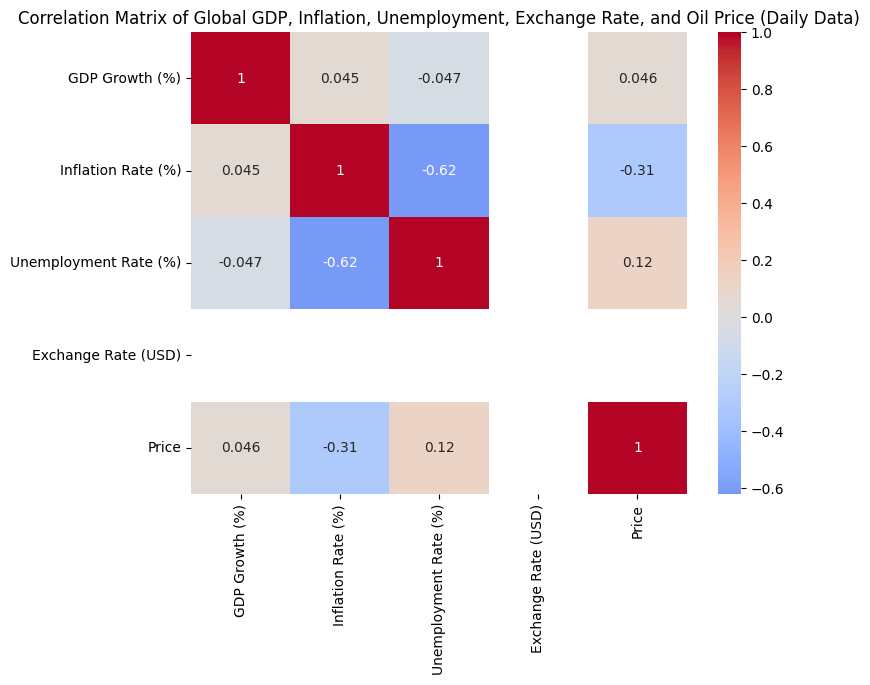

Indicators not available in merged data. Available indicators are: ['GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Exchange Rate (USD)', 'Price']


In [14]:
# Calculate correlations and visualize
analysis.calculate_correlations()             # Step 5: Calculate and visualize correlation matrix
analysis.specific_correlation("GDP Growth (%)", "Oil Price")  # Step 6: Check specific correlation


In [15]:
df = pd.read_csv('merged_data.csv')

In [16]:
df.isnull().sum()

Date                        0
GDP Growth (%)              0
Inflation Rate (%)          0
Unemployment Rate (%)     925
Exchange Rate (USD)      9011
Price                       0
dtype: int64

In [17]:
df

,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (USD),Price
0,1987-05-20,3.724627,5.710119,NaN,NaN,18.63
1,1987-05-21,3.724627,5.710119,NaN,NaN,18.45
2,1987-05-22,3.724627,5.710119,NaN,NaN,18.55
3,1987-05-25,3.724627,5.710119,NaN,NaN,18.60
4,1987-05-26,3.724627,5.710119,NaN,NaN,18.63
...,...,...,...,...,...,...
9006,2022-11-08,3.089607,7.967574,5.264616,NaN,96.85
9007,2022-11-09,3.089607,7.967574,5.264616,NaN,93.05
9008,2022-11-10,3.089607,7.967574,5.264616,NaN,94.25
9009,2022-11-11,3.089607,7.967574,5.264616,NaN,96.37


In [18]:
df1=pd.read_csv(file_path)

In [19]:
df1['Date'] = pd.to_datetime(df1['Date'])


C:\Users\marta\AppData\Local\Temp\ipykernel_13304\72672779.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [20]:
df1['Date'].max()

Timestamp('2022-11-14 00:00:00')